In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
from RediCell_cupy import *
from DesignTool import *

In [2]:
d = DesignTool()
d.get_blanket_space([119, 57, 57], spacing=16e-9, wall=False)
d.add_ecoli_rod(l=1.8e-6, r=0.4e-6, barrier_type=1, space_type=1, offsety=0, thickness=2, method='const')#, offsety=1.6e-7)
d.special_space_type[d.barrier_type==1] = 2
d.barrier_type[d.special_space_type==1] = 2
d.barrier_type[d.special_space_type==0] = 3
cyt = np.where(d.special_space_type == 1)
v_cyt = len(cyt[0])
print(v_cyt)
v_cyt_b = np.random.choice(v_cyt, v_cyt//2, replace=False)
b_sel = [x[v_cyt_b] for x in cyt]
d.barrier_type[b_sel[0], b_sel[1], b_sel[2]] = 4

# Type   Space_type    Barrier_type
#    0   External      Border wall
#    1   Cytoplasm     Membrane
#    2   Membrane      Cytoplasm
#    3   None          External
#    4   None          Cytoplasm_blockers


%matplotlib inline
# d.draw3D(exclude_barrier_type=[0], exclude_space_type=[0])


Sides are [119  57  57] with spacing of 1.6e-08 m (3 dimensions).
Overall system sizes are [1.904e-06 9.120e-07 9.120e-07] m
Voxel [59 28 28] has a coordinate of [0. 0. 0.]
Voxel [90, 28, 28] has a coordinate of [4.96e-07 0.00e+00 0.00e+00]
Voxel [28, 28, 28] has a coordinate of [-4.96e-07  0.00e+00  0.00e+00]
Determined factor for a separating boundary as 0.7
Determined factor for a separating boundary as 0.7
Determined factor for a separating boundary as 0.7
Successfully created a E. coli rod
185908


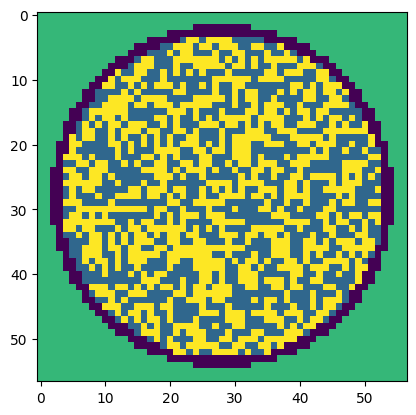

In [3]:
plt.imshow(d.barrier_type[83])

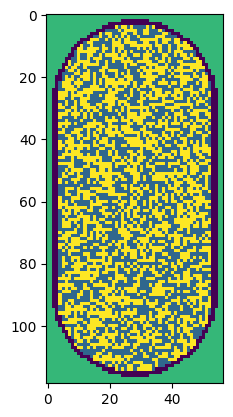

In [4]:
plt.imshow(d.barrier_type[:, 30])

In [5]:
mol_Iex =   Molecule('Iex',   diffusion_coefficient=1.28e-12, observed_barrier_types=None)
mol_I =     Molecule('I',   diffusion_coefficient=1.28e-12, observed_barrier_types=None)
mol_Y =     Molecule('Y',     diffusion_coefficient=0.1e-12,  observed_barrier_types=[2, 3, 4])
mol_YI =    Molecule('YI',    diffusion_coefficient=0.1e-12,  observed_barrier_types=[2, 3, 4])
mol_R2 =    Molecule('R2',    diffusion_coefficient=1e-12,    observed_barrier_types=[1, 4])
mol_R2O =   Molecule('R2O',   diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
mol_IR2 =   Molecule('IR2',   diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
mol_O =     Molecule('O',     diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
mol_IR2O =  Molecule('IR2O',  diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
mol_I2R2O = Molecule('I2R2O', diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
mol_mY =    Molecule('mY',    diffusion_coefficient=0.1e-12,  observed_barrier_types=[3, 4])
mol_I2R2 =  Molecule('I2R2',  diffusion_coefficient=1.28e-12, observed_barrier_types=[1, 4])
# molset = MoleculeSet([mol_Iex, mol_I, mol_Y, mol_YI, mol_R2, mol_R2O, mol_IR2, mol_O, mol_IR2O, mol_I2R2O, mol_mY, mol_I2R2])
molset = MoleculeSet([mol_O, mol_mY])

In [6]:
rxset = ReactionSet()
# rxset.add_reaction(['R2', 'O'], ['R2O'], 2.43e6)
# rxset.add_reaction(['IR2', 'O'], ['IR2O'], 1.21e6)
# rxset.add_reaction(['I2R2', 'O'], ['I2R2O'], 2.43e4)
# rxset.add_reaction(['R2O'], ['R2', 'O'], 6.3e-4)
# rxset.add_reaction(['IR2O'], ['IR2', 'O'], 6.3e-4)
# rxset.add_reaction(['I2R2O'], ['I2R2', 'O'], 3.15e-1)
rxset.add_reaction(['O'], ['mY', 'O'], 1.26e-1)
# rxset.add_reaction(['mY'], ['mY', 'Y'], 4.44e-2, location=d.special_space_type==2)
# rxset.add_reaction(['mY'], [], 1.11e-2, location=d.special_space_type==2)
# rxset.add_reaction(['Y'], [], 2.1e-4)
# rxset.add_reaction(['I', 'R2'], ['IR2'], 9.71e4)
# rxset.add_reaction(['I', 'IR2'], ['I2R2'], 4.85e4)
# rxset.add_reaction(['I', 'R2O'], ['IR2O'], 2.24e4)
# rxset.add_reaction(['I', 'IR2O'], ['I2R2O'], 1.12e4)
# rxset.add_reaction(['IR2'], ['I', 'R2'], 2e-1)
# rxset.add_reaction(['I2R2'], ['I', 'IR2'], 4e-1)
# rxset.add_reaction(['IR2O'], ['I', 'R2O'], 1.0)
# rxset.add_reaction(['I2R2O'], ['I', 'IR2O'], 2.0)
# rxset.add_reaction(['Iex'], ['I'], 2.33e-3)
# rxset.add_reaction(['I'], ['Iex'], 2.33e-3)
# rxset.add_reaction(['Y', 'Iex'], ['YI'], 3.03e+4)
# rxset.add_reaction(['YI'], ['Y', 'Iex'], 1.2e-1)
# rxset.add_reaction(['YI'], ['Y', 'I'], 1.2e+1)


In [7]:
a = RediCell_CuPy(design=d, molecule_types=molset, reaction_set=rxset, t_step=50e-6)

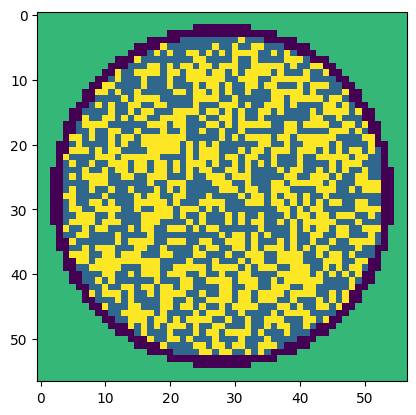

In [8]:
plt.imshow(a.barrier_type[80].get())

In [9]:
a.partition()

Reagent list: [[0]]
Action list:
Diffusion of O (6 directions)
Diffusion of mY (6 directions)
Reaction: reagent ['O'] -> product ['mY', 'O']


In [10]:
a.configure_barrier()

In [11]:
a.voxel_matrix.shape

(2, 119, 57, 57)

In [12]:
# Initial conditions

# 1 O and 9 R2
cyto_avail = np.where((a.special_space_type == 1) & (a.barrier_type != 4))
n_ca = len(cyto_avail[0])
OR2 = np.random.choice(n_ca, 10, replace=False)
ca_sel = [x[OR2] for x in cyto_avail]

a.voxel_matrix[a.mol_to_id['O'], ca_sel[0][0], ca_sel[1][0], ca_sel[2][0]] = 1
# a.voxel_matrix[a.mol_to_id['R2'], ca_sel[0][1:], ca_sel[1][1:], ca_sel[2][1:]] = 1

# # 30 Y
# mem_avail = np.where(a.special_space_type == 2)
# n_ma = len(mem_avail[0])
# OR2 = np.random.choice(n_ma, 30, replace=False)
# ma_sel = [x[OR2] for x in mem_avail]
# a.voxel_matrix[a.mol_to_id['Y'], ma_sel[0], ma_sel[1], ma_sel[2]] = 1

# # 5 uM of Iex and I
# ext_avail = np.where(a.special_space_type > -1)
# n_ea = len(ext_avail[0])
# n_Iex = int(n_ea / a.one_per_voxel_equal_um * 5.0)
# print(n_ea, n_Iex)
# Iex = np.random.choice(n_ea, n_Iex, replace=False)
# ea_sel = [x[Iex] for x in ext_avail]
# a.voxel_matrix[a.mol_to_id['Iex'], ea_sel[0], ea_sel[1], ea_sel[2]] = 1

# cyto_all = np.where(a.special_space_type > -1)
# n_call = len(cyto_all[0])
# n_Iin = int(n_call / a.one_per_voxel_equal_um * 5.0)
# Iin = np.random.choice(n_ea, n_Iin, replace=False)
# call_sel = [x[Iin] for x in cyto_all]
# a.voxel_matrix[a.mol_to_id['I'], call_sel[0], call_sel[1], call_sel[2]] = 1

# # Type   Space_type    Barrier_type
# #    0   External      Border wall
# #    1   Cytoplasm     Membrane
# #    2   Membrane      Cytoplasm
# #    3   None          External
# #    4   None          Cytoplasm_blockers

In [13]:
a.one_per_voxel_equal_um

405.3472106923459

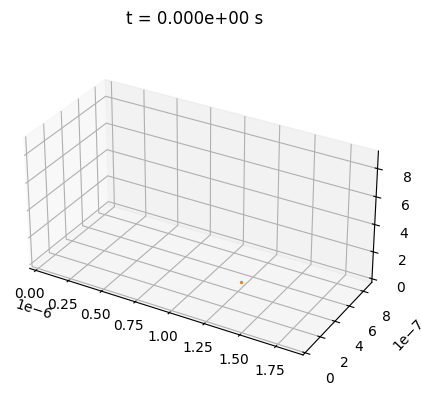

In [14]:
a.plot3D(['mY', 'O'], wall=False)

In [15]:
a.maintain_external_conditions()

In [16]:
a.determine_maximum_timestep()

Max time step is 5.00e-05 s (max 1.0 particles in voxel)


array(5.e-05, dtype=float32)

In [17]:
a.simulate(100000, t_step=5e-5, plot_every=None, timing=False, 
           checkpoint_every=None, checkpoint_filename='full_ecoli.pkl', 
           traj_every=None, traj_filename='full_ecoli.npy', log_every=100)
# a.plot(['Iex', 'Iin'], wall=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

Simulate 100000 steps


100%|██████████| 100000/100000 [02:01<00:00, 823.23it/s]


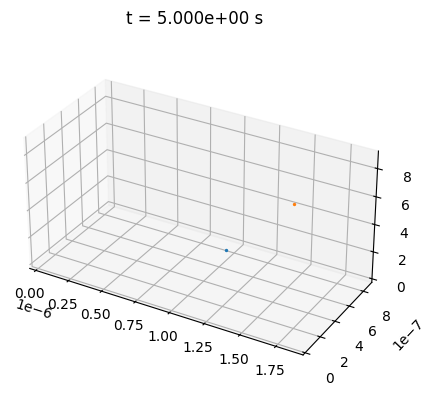

In [18]:
a.plot(['mY', 'O'], wall=False)

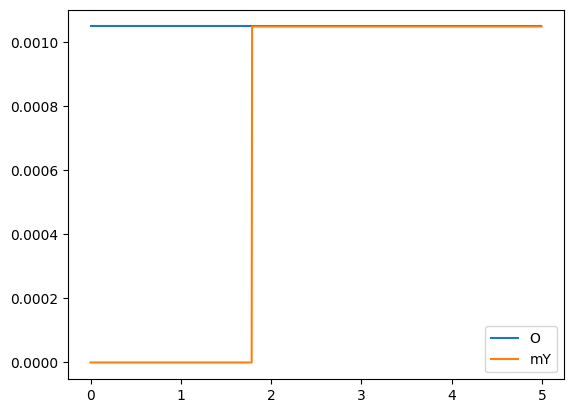

In [19]:
plt.plot(a.t_trace, np.array([x.astype(cp.float32).get() for x in a.conc_trace]) * a.one_per_voxel_equal_um / np.prod(np.array(a.voxel_matrix[0].shape)), label=a.mol_to_id)
plt.legend()
# plt.yticks(range(7))
# plt.yscale('log')

In [32]:
a.voxel_matrix[1].astype(cp.float32).get().sum()

51.0

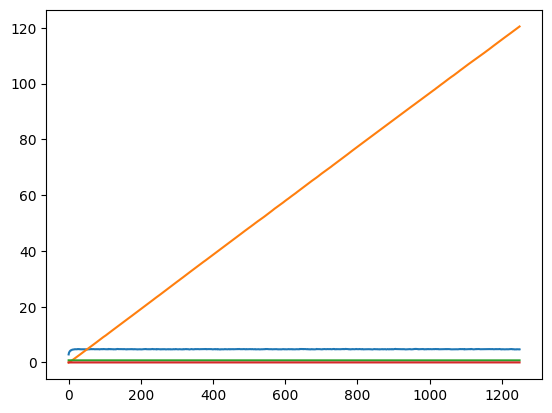

In [33]:
plt.plot(b.t_trace, np.array([x.astype(cp.float32).get() for x in b.conc_trace]) * b.one_per_voxel_equal_um / np.prod(np.array(b.voxel_matrix[0].shape) - 2))
# plt.yticks(range(7))
# plt.yscale('log')

In [93]:
a.one_per_voxel_equal_um

405.3472106923459

In [148]:
a.one_per_voxel_equal_um * float(a.voxel_matrix[a.mol_to_id['Iex']].sum()) / np.prod(np.array(a.voxel_matrix[0].shape))

5.794225421920151

In [26]:
np.prod(np.array(a.voxel_matrix[0].shape) - 2)

524288